In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)


In [2]:
# Load CSV
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Raisin_Dataset.csv')

# Basic info
print(df.info())
print(df['Class'].value_counts())  # Check class balance
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB
None
Class
Kecimen    450
Besni      450
Name: count, dtype: int64


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [3]:
# Encode 'Class' (Kecimen → 1, Besni → 0)
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])  # Kecimen = 1

# Separate features and target
X = df.drop(columns='Class')
y = df['Class']

In [4]:
# Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [6]:
# Predict class
y_pred = model.predict(X_test_scaled)

# Predict probabilities (for ROC-AUC)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("ROC-AUC Score:", roc)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8555555555555555
Precision: 0.8777777777777778
Recall: 0.8404255319148937
ROC-AUC Score: 0.9307273626917367

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        86
           1       0.88      0.84      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



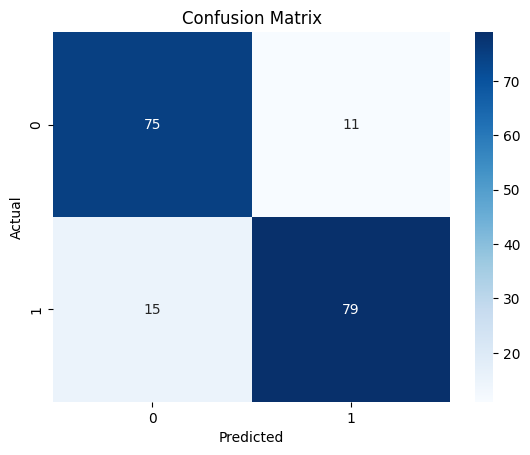

In [7]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

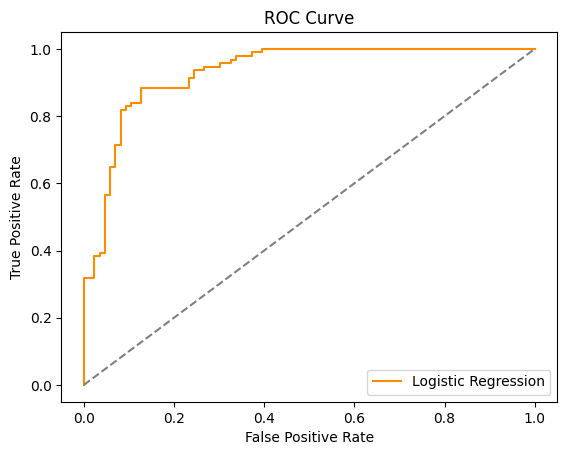

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label="Logistic Regression", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [10]:
import numpy as np

def sigmoid(z):
  return 1 / (1 + np.exp(-z))